In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import data from in vitro time series RNA-seq data

In [20]:
sampleTable = pd.read_csv("../Data/in_vitro/Sample_table/sampleTable.csv")
counts = pd.read_csv("../Data/in_vitro/Read_counts/counts.csv")
counts = counts.rename(index = str, columns = {"Unnamed: 0" : "ORF"})
counts = counts.set_index('ORF')
counts = counts.sum(axis=0)
libSize_vitro = pd.DataFrame(counts, columns = ["Number_of_Fragments"]).reset_index().rename(columns = {'index' : 'Sample'})

### Descriptive statistics for both 3D7 and FUP time series

In [21]:
libSize_vitro.describe()

,Number_of_Fragments
count,1.280000e+02
mean,2.428550e+07
std,9.191650e+06
min,6.723168e+06
25%,1.588046e+07
50%,2.580798e+07
75%,3.076912e+07
max,4.601655e+07


### Descriptive statistics for 3D7 time series

In [22]:
libSize_vitro[libSize_vitro['Sample'].str.contains("3D7")==True].describe()

,Number_of_Fragments
count,6.400000e+01
mean,2.719540e+07
std,7.679029e+06
min,1.069573e+07
25%,2.274791e+07
50%,2.643600e+07
75%,3.175578e+07
max,4.601655e+07


### Descriptive statistics for 3D7 time series

In [23]:
libSize_vitro[libSize_vitro['Sample'].str.contains("FUP")==True].describe()

,Number_of_Fragments
count,6.400000e+01
mean,2.137560e+07
std,9.702707e+06
min,6.723168e+06
25%,1.200142e+07
50%,2.311641e+07
75%,2.985544e+07
max,3.965569e+07


In [24]:
exp_vitro = libSize_vitro.merge(
    sampleTable[['sampleName', 'Genotype', 'HPI', 'Strain', 'Patient', 'ID']], 
    left_on='Sample', 
    right_on='sampleName', 
    how='inner')
exp_vitro = exp_vitro.drop('sampleName', axis=1)

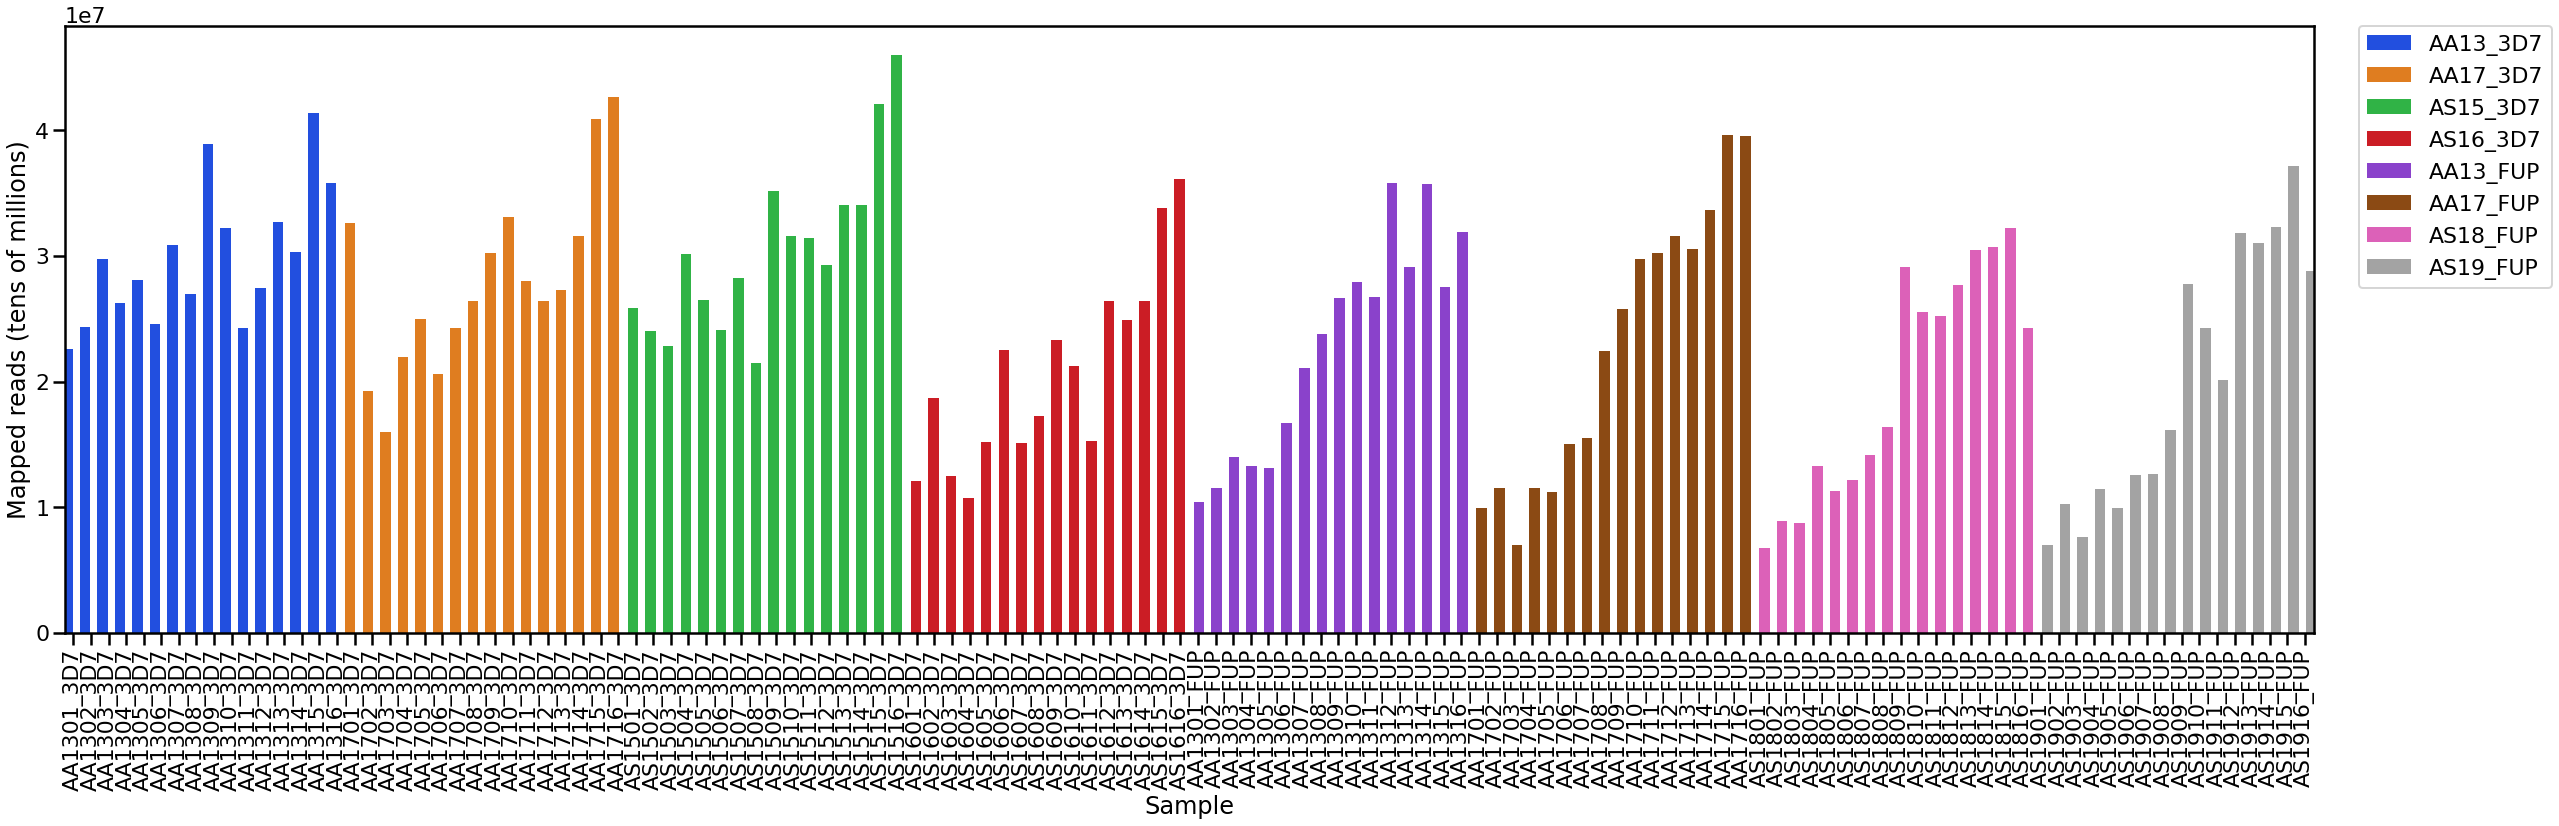

In [25]:
sns.set_context("poster")
plt.figure(figsize=(36,12))
ax = sns.barplot(
    data=exp_vitro,    
    x="Sample", 
    y="Number_of_Fragments", 
    hue = 'ID',
    palette = "bright")
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Sample', ylabel='Mapped reads (tens of millions)')
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

### Import data from in vivo Mali samples

In [26]:
sampleTable_vivo = pd.read_csv("../Data/in_vivo/Sample_table/sampleTable.csv")
counts_vivo = pd.read_csv("../Data/in_vivo/Read_counts/counts.csv")
counts_vivo = counts_vivo.rename(index = str, columns = {"Unnamed: 0" : "ORF"})
counts_vivo = counts_vivo.set_index('ORF')
counts_vivo = counts_vivo.sum(axis=0)
libSize_vivo = pd.DataFrame(counts_vivo, columns = ["Number_of_Fragments"]).reset_index().rename(columns = {'index' : 'Sample'})

### Descriptive statistics for in vivo RNA-seq data

In [27]:
libSize_vivo.describe()

,Number_of_Fragments
count,3.200000e+01
mean,9.069744e+06
std,8.315638e+06
min,1.017756e+06
25%,3.759526e+06
50%,6.635800e+06
75%,9.944619e+06
max,3.640957e+07


In [28]:
exp_vivo = libSize_vivo.merge(
    sampleTable_vivo[['sampleName', 'Genotype']], 
    left_on='Sample', 
    right_on='sampleName', 
    how='inner')
exp_vivo = exp_vivo.drop('sampleName', axis=1)

### Descriptive statistics for HbAA samples

In [29]:
exp_vivo[exp_vivo['Genotype'] == 'AA'].describe()

,Number_of_Fragments
count,1.600000e+01
mean,1.039043e+07
std,9.802624e+06
min,1.017756e+06
25%,5.022186e+06
50%,6.719190e+06
75%,1.195815e+07
max,3.640957e+07


### Descriptive statistics for HbAS samples

In [30]:
exp_vivo[exp_vivo['Genotype'] == 'AS'].describe()

,Number_of_Fragments
count,1.600000e+01
mean,7.749058e+06
std,6.564847e+06
min,1.696908e+06
25%,3.141928e+06
50%,6.415112e+06
75%,8.637829e+06
max,2.736426e+07


Define colors for HbAA and HbAS genotypes

In [31]:
pal = sns.color_palette('bright')
pal = pal.as_hex()
clrs = [pal[0], pal[3]]

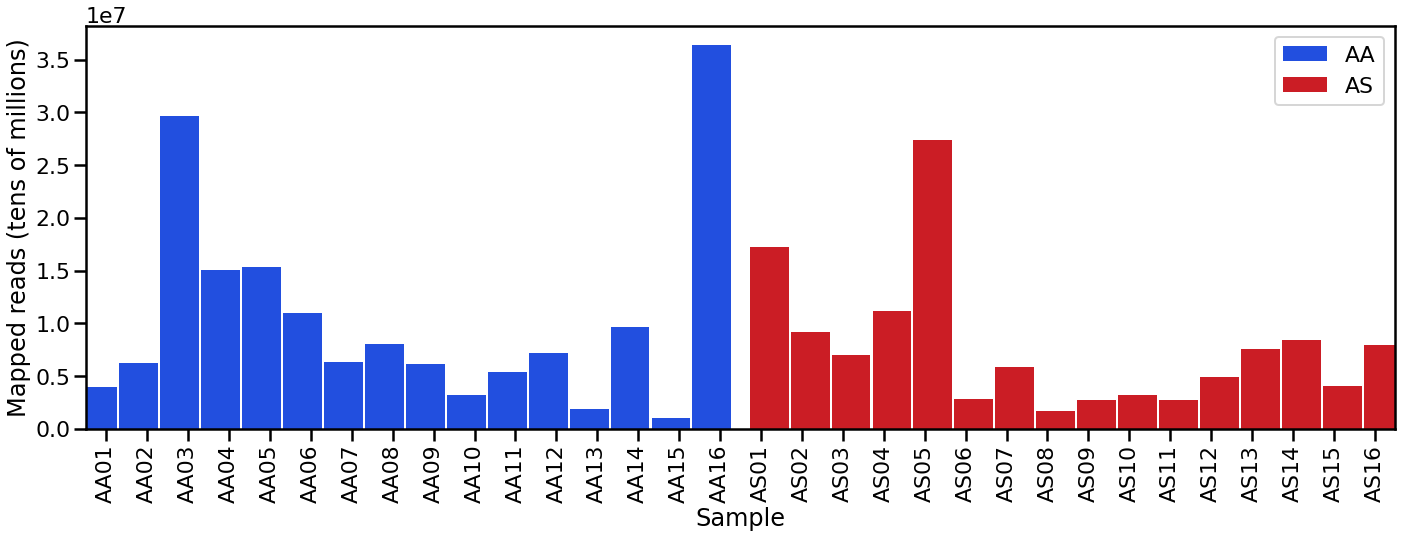

In [32]:
sns.set_context("poster")
plt.figure(figsize=(20,8))
ax = sns.barplot(
    data=exp_vivo,    
    x="Sample", 
    y="Number_of_Fragments", 
    hue = 'Genotype',
    palette = clrs)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + (diff * .5))

change_width(ax, .95)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Sample', ylabel='Mapped reads (tens of millions)')
ax.legend(loc=1)
plt.tight_layout()